In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CA_prostate.csv')
df

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,malignant
0,23,12,151,954,0.143,0.278,0.242,0.079,1
1,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,14,16,78,386,0.070,0.284,0.260,0.097,1
4,9,19,135,1297,0.141,0.133,0.181,0.059,1
...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,1
96,22,14,78,451,0.105,0.071,0.190,0.066,0
97,19,27,62,295,0.102,0.053,0.135,0.069,0
98,21,24,74,413,0.090,0.075,0.162,0.066,0


In [3]:
#14 พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสองอย่าง พร้อมให้เหตุผล 
# ควรทำ normalization เพราะ แต่ละfeatureมี scale แตกต่างกัน
# ไม่ควรทำ standardization เพราะ ข้อมูลไม่เป็น normal distribution

In [4]:
#15 เลือกช้อยที่ดีที่สุดจากข้อ 14 
# Normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
arr_minmax = min_max_scaler.fit_transform(df.drop(['malignant'],axis=1))
arr_minmax

array([[0.875     , 0.0625    , 0.825     , 0.44868735, 1.        ,
        0.78175896, 0.63313609, 0.59090909],
       [0.        , 0.125     , 0.675     , 0.67064439, 1.        ,
        0.13355049, 0.27218935, 0.09090909],
       [0.75      , 1.        , 0.65      , 0.59725537, 0.75342466,
        0.39739414, 0.4260355 , 0.15909091],
       [0.3125    , 0.3125    , 0.21666667, 0.1097852 , 0.        ,
        0.80130293, 0.73964497, 1.        ],
       [0.        , 0.5       , 0.69166667, 0.65334129, 0.97260274,
        0.30944625, 0.27218935, 0.13636364],
       [1.        , 0.875     , 0.25833333, 0.16408115, 0.79452055,
        0.42996743, 0.43786982, 0.52272727],
       [0.4375    , 0.9375    , 0.56666667, 0.5       , 0.34246575,
        0.23127036, 0.26035503, 0.09090909],
       [0.375     , 0.4375    , 0.31666667, 0.22434368, 0.67123288,
        0.41368078, 0.50295858, 0.5       ],
       [0.625     , 0.8125    , 0.3       , 0.18973747, 0.78082192,
        0.50488599, 0.591715

In [5]:
new_df = pd.DataFrame(arr_minmax, columns=df.columns[:-1])
new_df

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364
...,...,...,...,...,...,...,...,...
95,0.8750,0.3125,0.666667,0.633652,0.287671,0.302932,0.443787,0.068182
96,0.8125,0.1875,0.216667,0.148568,0.479452,0.107492,0.325444,0.295455
97,0.6250,1.0000,0.083333,0.055489,0.438356,0.048860,0.000000,0.363636
98,0.7500,0.8125,0.183333,0.125895,0.273973,0.120521,0.159763,0.295455


In [6]:
#12 สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, df['malignant'], test_size=0.3, random_state=80)

In [7]:
#Train model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
predicted = svc.predict(X_test)
predicted

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [9]:
#16 วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [10]:
confusion_matrix(y_test, predicted)

array([[ 5,  4],
       [ 2, 19]], dtype=int64)

In [11]:
print('Accuracy = ', accuracy_score(y_test, predicted))
print('Precision = ', precision_score(y_test, predicted))
print('Recall score = ', recall_score(y_test, predicted))
print('F1 score = ', f1_score(y_test, predicted))

Accuracy =  0.8
Precision =  0.8260869565217391
Recall score =  0.9047619047619048
F1 score =  0.8636363636363636


In [12]:
#17 หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้ GridSearch (Hyperparameter Tuning)
from sklearn.model_selection import GridSearchCV
param_combination = { 'C':[0.01,0.1,1,10,100,1000,10000], 'gamma':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
grid_search = GridSearchCV(SVC(), param_combination, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.643, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.643, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .

[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.571, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.643, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.571, total=   0.0s
[CV] C

[CV] ..................... C=100, gamma=10, score=0.786, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.714, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.643, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.643, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] .

[CV] .................. C=10000, gamma=0.1, score=0.714, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] .................. C=10000, gamma=0.1, score=0.857, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] .................. C=10000, gamma=0.1, score=0.786, total=   0.0s
[CV] C=10000, gamma=0.1 ..............................................
[CV] .................. C=10000, gamma=0.1, score=0.571, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] .................... C=10000, gamma=1, score=0.857, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] .................... C=10000, gamma=1, score=0.714, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] .................... C=10000, gamma=1, score=0.857, total=   0.0s
[CV] C=10000, gamma=1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
grid_search.best_params_

{'C': 1, 'gamma': 1}

In [14]:
grid_predicted = grid_search.predict(X_test)
grid_predicted

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [15]:
#หลังจาก hyperparameter tuning
confusion_matrix(y_test, grid_predicted)

array([[ 6,  3],
       [ 2, 19]], dtype=int64)

In [16]:
#หลังจาก hyperparameter tuning --> ผลลัพธ์ดีขึ้นเล็กน้อย
print('Accuracy = ', accuracy_score(y_test, grid_predicted))
print('Precision = ', precision_score(y_test, grid_predicted))
print('Recall score = ', recall_score(y_test, grid_predicted))
print('F1 score = ', f1_score(y_test, grid_predicted))

Accuracy =  0.8333333333333334
Precision =  0.8636363636363636
Recall score =  0.9047619047619048
F1 score =  0.8837209302325582


In [17]:
#ก่อน hyperparameter tuning
confusion_matrix(y_test, predicted)

array([[ 5,  4],
       [ 2, 19]], dtype=int64)

In [18]:
#ก่อน hyperparameter tuning
print('Accuracy = ', accuracy_score(y_test, predicted))
print('Precision = ', precision_score(y_test, predicted))
print('Recall score = ', recall_score(y_test, predicted))
print('F1 score = ', f1_score(y_test, predicted))

Accuracy =  0.8
Precision =  0.8260869565217391
Recall score =  0.9047619047619048
F1 score =  0.8636363636363636


In [19]:
#18 เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features
new_X_train = X_train[['radius','texture','smoothness','symmetry']]
new_X_test = X_test[['radius','texture','smoothness','symmetry']]

In [20]:
#train model
svc.fit(new_X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
predicted2 = svc.predict(new_X_test)
predicted2

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [22]:
confusion_matrix(y_test, predicted2)

array([[ 4,  5],
       [ 8, 13]], dtype=int64)

In [23]:
print('Accuracy = ', accuracy_score(y_test, predicted2))
print('Precision = ', precision_score(y_test, predicted2))
print('Recall score = ', recall_score(y_test, predicted2))
print('F1 score = ', f1_score(y_test, predicted2))

Accuracy =  0.5666666666666667
Precision =  0.7222222222222222
Recall score =  0.6190476190476191
F1 score =  0.6666666666666666


In [24]:
# ลองทำแบบไม่ normalization ก่อน
df

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,malignant
0,23,12,151,954,0.143,0.278,0.242,0.079,1
1,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,14,16,78,386,0.070,0.284,0.260,0.097,1
4,9,19,135,1297,0.141,0.133,0.181,0.059,1
...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,1
96,22,14,78,451,0.105,0.071,0.190,0.066,0
97,19,27,62,295,0.102,0.053,0.135,0.069,0
98,21,24,74,413,0.090,0.075,0.162,0.066,0


In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df.drop(['malignant'],axis=1), df['malignant'], test_size=0.3, random_state=80)

In [26]:
svc.fit(X2_train,y2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
predicted3 = svc.predict(X2_test)

In [28]:
predicted3

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [29]:
# แบบไม่ normalization, ไม่ hyperparameter tuning (default)
confusion_matrix(y2_test, predicted3)

array([[ 5,  4],
       [ 0, 21]], dtype=int64)

In [44]:
# แบบไม่ normalization, ไม่ hyperparameter tuning (default)
print('Accuracy = ', accuracy_score(y2_test, predicted3))
print('Precision = ', precision_score(y2_test, predicted3))
print('Recall score = ', recall_score(y2_test, predicted3))
print('F1 score = ', f1_score(y2_test, predicted3))

Accuracy =  0.8666666666666667
Precision =  0.84
Recall score =  1.0
F1 score =  0.9130434782608696


In [45]:
## hyperparameter tuning + ไม่ normalization ##
from sklearn.model_selection import GridSearchCV
param_combination = {'C':[0.01,0.1,1,10,100,1000,10000], 'gamma':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
grid_search = GridSearchCV(SVC(), param_combination, verbose=3)
grid_search.fit(X2_train,y2_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.643, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] ................. C=0.01, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................ C=0.01, gamma=0.0001, score=0.643, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.571, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.643, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] .

[CV] ................... C=10, gamma=0.001, score=0.643, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.500, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.857, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.643, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.714, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.571, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .

[CV] ................. C=1000, gamma=1e-05, score=0.929, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.643, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.714, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.571, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.643, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.714, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [46]:
grid_search.best_params_

{'C': 1, 'gamma': 1e-05}

In [33]:
grid_predicted2 = grid_search.predict(X2_test)
grid_predicted2

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [34]:
# hyperparameter tuning + ไม่ normalization
confusion_matrix(y2_test, grid_predicted2)

array([[ 7,  2],
       [ 1, 20]], dtype=int64)

In [35]:
# hyperparameter tuning + ไม่ normalization
print('Accuracy = ', accuracy_score(y2_test, grid_predicted2))
print('Precision = ', precision_score(y2_test, grid_predicted2))
print('Recall score = ', recall_score(y2_test, grid_predicted2))
print('F1 score = ', f1_score(y2_test, grid_predicted2))

Accuracy =  0.9
Precision =  0.9090909090909091
Recall score =  0.9523809523809523
F1 score =  0.9302325581395349


In [39]:
#19 ทำ Visualization ของค่า F1 Score ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
#20 ทำ Visualization ของค่า Recall ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
#21 ทำ Visualization ของค่า Accuracy ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
x = ['default', 'GridSearch', 'Normalization']
F1_score = [0.9130434782608696,0.9302325581395349,0.8636363636363636]
Recall = [1.0,0.9523809523809523,0.9047619047619048]
Accuracy = [0.8666666666666667,0.9,0.8]

value = {'Metrics': ['F1_score','Recall','Accuracy'], 'default':[0.9130434782608696,1.0,0.8666666666666667],'GridSearch':[0.9302325581395349,0.9523809523809523,0.9]
           ,'Normalization':[0.8636363636363636,0.9047619047619048,0.8]}
df_value = pd.DataFrame(value, columns = ['Metrics','default','GridSearch','Normalization'])

df_value


,Metrics,default,GridSearch,Normalization
0,F1_score,0.913043,0.930233,0.863636
1,Recall,1.000000,0.952381,0.904762
2,Accuracy,0.866667,0.900000,0.800000


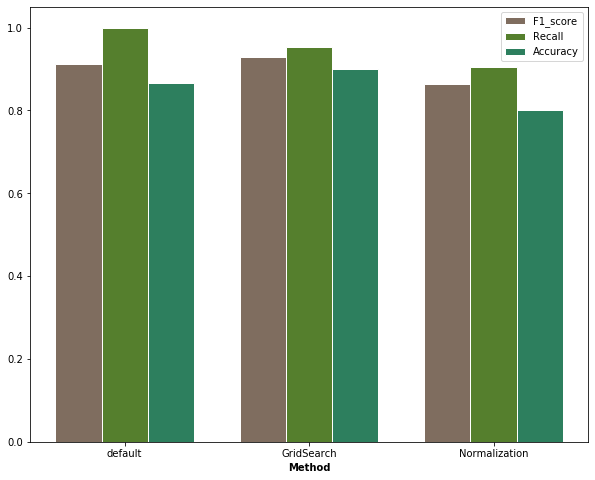

In [43]:
plt.figure(figsize=(10,8))
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = F1_score
bars2 = Recall
bars3 = Accuracy
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='F1_score')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Accuracy')
 
# Add xticks on the middle of the group bars
plt.xlabel('Method', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['default', 'GridSearch', 'Normalization'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
#22 สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ SVM Algorithm แล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้  
## Answer จากที่ทำมาทั้งหมด วิธีที่ไม่ทำnormalization + hyperparameter tuning ให้ผลลัพธ์ดีที่สุด precision สูงสุด
